<a href="https://colab.research.google.com/github/ndanilova/data_visualization/blob/main/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [ ]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm
from scipy.stats import chi2_contingency

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
path = "monster_com_job_sample.csv"
df = pd.read_csv(path, encoding="utf-8", on_bad_lines="skip")

print(df.head(5))

                    country country_code date_added has_expired  \
0  United States of America           US        NaN          No   
1  United States of America           US        NaN          No   
2  United States of America           US        NaN          No   
3  United States of America           US        NaN          No   
4  United States of America           US        NaN          No   

          job_board                                    job_description  \
0  jobs.monster.com  TeamSoft is seeing an IT Support Specialist to...   
1  jobs.monster.com  The Wisconsin State Journal is seeking a flexi...   
2  jobs.monster.com  Report this job About the Job DePuy Synthes Co...   
3  jobs.monster.com  Why Join Altec? If you’re considering a career...   
4  jobs.monster.com  Position ID#  76162 # Positions  1 State  CT C...   

                                           job_title             job_type  \
0               IT Support Technician Job in Madison   Full Time Employee  

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` |
```country_code``` |
```date_added``` |
```has_expired``` |
```job_board``` |
```job_description``` |
```job_title``` |
```job_type``` |
```location``` |
```organization``` |
```page_url``` |
```salary``` |
```sector``` |
```uniq_id``` |



```
```
Название столбца | Тип данных | Проблемы
--- | --- | ---
`country` | Строка (String) | Избыточные названия (напр. "United States of America" вместо "USA")
`country_code` | Строка (String) | Требуется проверка соответствия стандарту ISO
`date_added` | Дата (Date) | **Все значения NaN** - отсутствие данных
`has_expired` | Логический (Boolean) | Все значения "No" (нет вариативности)
`job_board` | Строка (String) | Нестандартизированные URL (напр. "jobs.monster.com")
`job_description` | Строка (String) | Спецсимволы (напр. "вАҐ"), неформатированный текст
`job_title` | Строка (String) | Избыточные фразы ("Job in Madison" в названии)
`job_type` | Строка (String) | Неоднородные форматы ("Full Time Employee" vs "Full-Time")
`location` | Строка (String) | Смешанные данные (город+штат+индекс)
`organization` | Строка (String) | **Много NaN** - отсутствие данных
`page_url` | Строка (String) | Длинные URL с параметрами (?mescoid=...)
`salary` | Строка (String) | **Много NaN**, разные форматы ("25.00 $/hour", "120,000.00 $/year")
`sector` | Строка (String) | **Много NaN**, неоднородные категории
`uniq_id` | Строка (String) | Требуется проверка уникальности

```



### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


####Таблица по пропускам ####

In [ ]:
missing_stats = pd.DataFrame({
    'Total cells': df.shape[0],
    'Empty cells': df.isnull().sum()
})
missing_stats['Percentage of passes (%)'] = (missing_stats['Empty cells'] / df.shape[0] * 100).round(2)
print(missing_stats)


                 Total cells  Empty cells  Percentage of passes (%)
country                22000            0                      0.00
country_code           22000            0                      0.00
date_added             22000        21878                     99.45
has_expired            22000            0                      0.00
job_board              22000            0                      0.00
job_description        22000            0                      0.00
job_title              22000            0                      0.00
job_type               22000         1628                      7.40
location               22000            0                      0.00
organization           22000         6867                     31.21
page_url               22000            0                      0.00
salary                 22000        18554                     84.34
sector                 22000         5194                     23.61
uniq_id                22000            0       

####Количество строк, где более 75% ячеек пустые####

In [ ]:
threshold = 0.75 * df.shape[1]

empty_rows_mask = df.isnull().sum(axis=1) > threshold

empty_rows_count = empty_rows_mask.sum()

print(f'Количество строк с более чем 75% пропусков: {empty_rows_count}')

Количество строк с более чем 75% пропусков: 0


Если строк, в которых более 75% ячеек пустые, 0, это означает, что в каждой строке присутствует большинство данных, и ваш датасет: полноценный, не сильно испорчен пропусками, не требует грубой очистки или удаления строк.

Это значит, что можно сосредоточиться на: удалении/обработке отдельных столбцов с пропусками, или на заполнении (импутации) пропусков, если они в критически важных полях.

####Визуализация пропусков ####

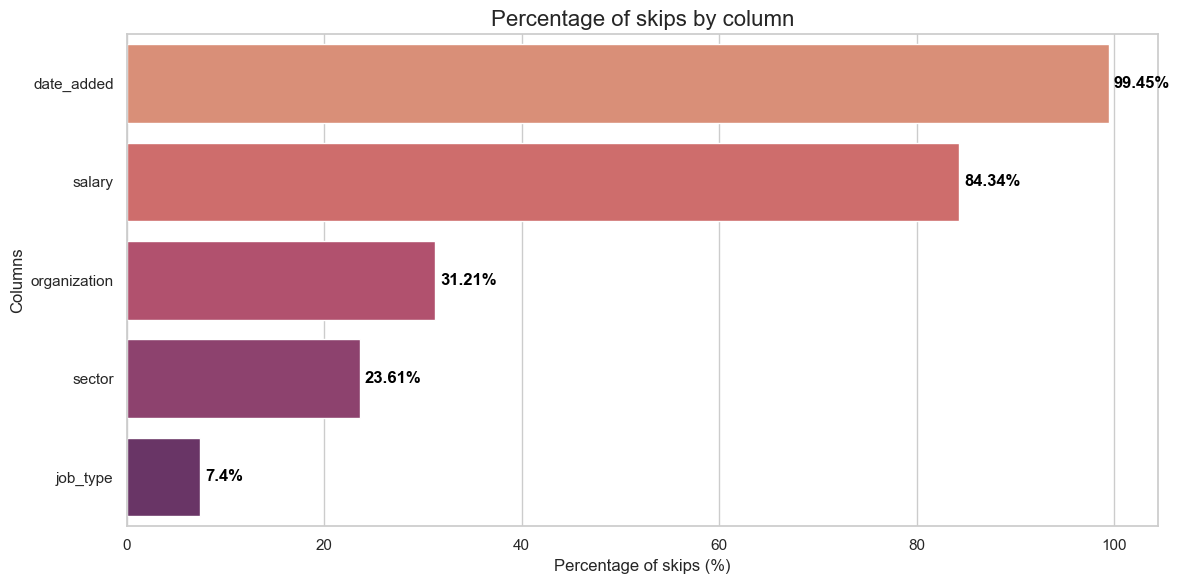

In [ ]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "column": missing_percent.index,
    "percent": missing_percent.values
})

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=missing_df,
    x="percent",
    y="column",
    hue="column",
    palette="flare",
    dodge=False,
    legend=False
)

for i, v in enumerate(missing_df["percent"]):
    ax.text(v + 0.5, i, f"{v}%", color='black', va='center', fontweight='bold')

plt.title("Percentage of skips by column", fontsize=16)
plt.xlabel("Percentage of skips (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.tight_layout()
plt.show()


На диаграмме отобраэены только те столбцы, в которых есть пропуски.

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
initial_shape = df.shape

df_dropped = df.dropna()

final_shape = df_dropped.shape

removed_rows = initial_shape[0] - final_shape[0]

print(f"Размер до удаления: {initial_shape}")
print(f"Размер после удаления: {final_shape}")
print(f"Удалено строк: {removed_rows}")
print(f"Процент удалённых строк: {removed_rows / initial_shape[0] * 100:.2f}%")


Размер до удаления: (22000, 14)
Размер после удаления: (5, 14)
Удалено строк: 21995
Процент удалённых строк: 99.98%


**Вывод:**
Удаление всех строк с пропущенными значениями приводит к потере 99.98% данных, что нежелательно, так как может сильно исказить выборку и уменьшить её представительность.
Вместо этого стоит использовать заполнение пропущенных значений, удалять только "плохие" столбцы/строки с критичным количеством пропусков, или анализировать иные способы обработки пропусков.

### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

####Столбцы с одним значением####

In [ ]:
single_value_columns = df.columns[df.nunique() == 1].tolist()
print("Столбцы с одним уникальным значением:", single_value_columns)

Столбцы с одним уникальным значением: ['country', 'country_code', 'has_expired', 'job_board']


Страна всегда равна United States of America

Код страны всегда US

has_expired всегда NO

job_board всегда jobs.monster.com

####Значения в нескольких столбцах####

In [ ]:
value_counts = defaultdict(int)
for column in df.columns:
    for value in df[column].dropna().astype(str):
        value_counts[value] += 1

common_values = {k: v for k, v in value_counts.items() if v > 1}
print("Значения в нескольких столбцах:", common_values)

Значения в нескольких столбцах: {'United States of America': 22000, 'US': 22000, '5/9/2016': 2, '7/15/2016': 2, '7/8/2016': 2, '10/28/2016': 2, '4/28/2016': 2, '4/27/2016': 2, '4/29/2016': 2, '9/22/2016': 6, '3/25/2016': 2, '6/20/2016': 2, '7/11/2016': 2, '5/5/2016': 3, '3/17/2016': 2, '4/4/2016': 2, '4/7/2016': 2, '9/21/2016': 2, '5/18/2016': 2, '3/15/2016': 2, '6/7/2016': 2, '12/2/2016': 2, '3/29/2016': 3, '4/8/2016': 2, '5/26/2016': 4, '12/15/2016': 2, '10/27/2016': 2, '7/7/2016': 4, '9/5/2016': 2, '3/22/2016': 2, '3/21/2016': 4, '6/3/2016': 3, '3/24/2016': 2, 'No': 22000, 'jobs.monster.com': 22000, "Aflac Insurance Sales Agent While a career in sales may not be for everyone, those who have been successful say it’s been one of the most rewarding ventures of their lives. So what do these people have in common? They’re problem solvers. They share the desire to help people. And they have a good work ethic. As an independent consultant backed by Aflac, you have the opportunity to run yo

Повторяющиеся значения могут говорить о дублировании, ошибках и прочих важных аспектах

####Данные, не соответствующие названию столбца####

In [ ]:
print("Типы данных:")
print(df.dtypes)


Типы данных:
country            object
country_code       object
date_added         object
has_expired        object
job_board          object
job_description    object
job_title          object
job_type           object
location           object
organization       object
page_url           object
salary             object
sector             object
uniq_id            object
dtype: object


Странным показалось делать зарплату типом object. Но в таблице какие-то значения отображены строкой диапазоном и периодом, а какие-то вовсе не указаны. Также в поле uniq_id встречаются текста вместо айди.

### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

####Проверка уникальности uniq_id####

In [ ]:
is_uniq_id_unique = df['uniq_id'].is_unique
print(f"Все значения в 'uniq_id' уникальны: {is_uniq_id_unique}")

duplicates_in_uniq_id = df['uniq_id'].duplicated().sum()
print(f"Количество дубликатов в 'uniq_id': {duplicates_in_uniq_id}")

Все значения в 'uniq_id' уникальны: True
Количество дубликатов в 'uniq_id': 0


####Поиск еще столбцов с уникальными строками####

In [ ]:
unique_columns = []
for column in df.columns:
    if column != 'uniq_id' and df[column].nunique() == len(df):
        unique_columns.append(column)

print(f"Столбцы, где все значения уникальны: {unique_columns}")

Столбцы, где все значения уникальны: ['page_url']


####Строки, для которых значения по всем остальным столбцам будут совпадать####

In [ ]:
columns_to_check = [col for col in df.columns if col not in ['uniq_id', 'page_url']]

duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]

duplicates_sorted = duplicates.sort_values(by=columns_to_check)

if not duplicates_sorted.empty:
    print(f"Найдено дубликатов: {len(duplicates_sorted)}")
    print("\nПримеры дубликатов (первые 10 записей):")
    # Показываем только ключевые столбцы для наглядности
    print(duplicates_sorted[columns_to_check].head(10))
else:
    print("Дубликаты не найдены.")

Найдено дубликатов: 2078

Примеры дубликатов (первые 10 записей):
                        country country_code  date_added has_expired  \
15246  United States of America           US  10/27/2016          No   
15562  United States of America           US  10/27/2016          No   
4720   United States of America           US   9/22/2016          No   
10527  United States of America           US   9/22/2016          No   
4718   United States of America           US   9/22/2016          No   
10645  United States of America           US   9/22/2016          No   
2116   United States of America           US         NaN          No   
20303  United States of America           US         NaN          No   
4221   United States of America           US         NaN          No   
21142  United States of America           US         NaN          No   

              job_board                                    job_description  \
15246  jobs.monster.com  #TrackingJobBody table, #TrackingJobBo

Без учета уникальных столбцов найдено 2078 дублирующихся строк

# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

In [ ]:
df_location = df.copy()

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

####Определение форматов данных####
В столбце location встречаются следующие варианты:

Город + Штат + Индекс: "Madison, WI 53702"

Город + Штат: "Houston, TX"

Только Штат: "TX", "California"

Только Индекс: "90210"

Только Город: "New York"

Произвольные комбинации с разными разделителями: "San Francisco; CA", "Chicago IL"

In [ ]:
# Примеры строк
locations = [
    "Madison, WI 53702",
    "Houston, TX",
    "90210",
    "CA",
    "New York, NY 10001",
    "Chicago IL"
]

patterns = {
    "city_state_zip": r"^([A-Za-z\s]+),\s*([A-Z]{2})\s*(\d{5})$",  # "Город, ШТАТ ИНДЕКС"
    "city_state": r"^([A-Za-z\s]+),\s*([A-Z]{2})$",                 # "Город, ШТАТ"
    "state_only": r"^[A-Z]{2}$",                                    # "ШТАТ" (только код)
    "zip_only": r"^\d{5}$",                                         # "ИНДЕКС"
    "city_only": r"^[A-Za-z\s]+$"                                   # "Город"
}

def detect_format(loc):
    if pd.isna(loc) or loc.strip() == "":
        return "unknown"
    for fmt, pattern in patterns.items():
        if re.fullmatch(pattern, loc.strip()):
            return fmt
    return "unknown"

df_location["location_format"] = df_location["location"].apply(detect_format)

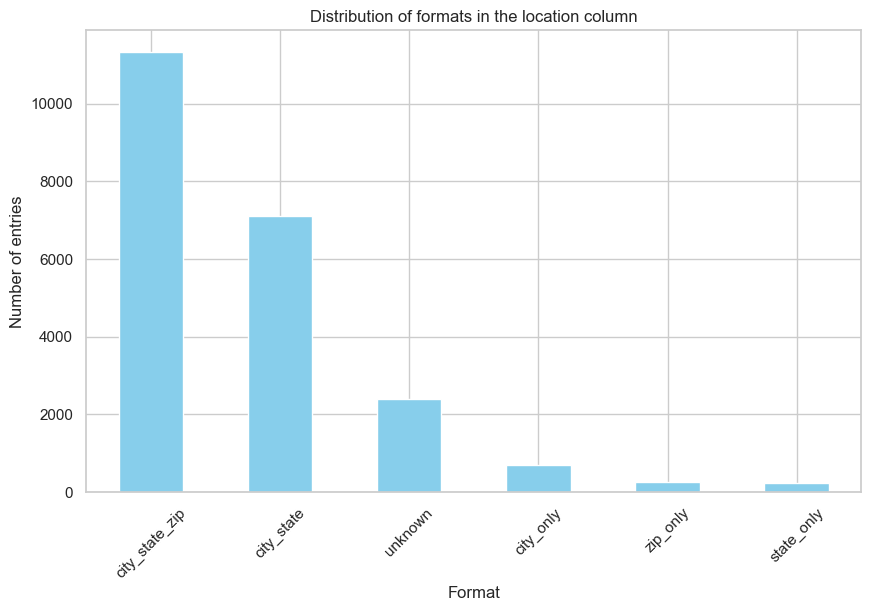

In [ ]:
format_counts = df_location["location_format"].value_counts()

plt.figure(figsize=(10, 6))
format_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of formats in the location column")
plt.xlabel("Format")
plt.ylabel("Number of entries")
plt.xticks(rotation=45)
plt.show()


#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [ ]:
def parse_location(location):
    if pd.isna(location):
        return None, None, None

    location = str(location).strip()

    # Удаляем явно некорректные строки
    if any(phrase in location for phrase in ["DePuy Synthes", "Contact name", "Sr. Process Engineer"]):
        return None, None, None

    city = None
    state = None
    zip_code = None

    state_pattern = r'\b([A-Z]{2})\b'
    zip_pattern = r'\b(\d{5})\b'

    state_match = re.search(state_pattern, location)
    if state_match:
        state = state_match.group(1)
        location = location.replace(state, '').strip()

    zip_match = re.search(zip_pattern, location)
    if zip_match:
        zip_code = zip_match.group(1)
        location = location.replace(zip_code, '').strip()

    if location:
        city = re.sub(r'^[,\s;]+|[,\s;]+$', '', location)
        if not city:  # Если после очистки ничего не осталось
            city = None

    return city, state, zip_code

df_location[['city', 'state', 'zip']] = df_location['location'].apply(
    lambda x: pd.Series(parse_location(x)))

# Преобразуем zip код в числовой формат
df_location['zip'] = pd.to_numeric(df_location['zip'], errors='coerce').astype('Int64')

# Проверяем результаты
print(df_location[['location', 'city', 'state', 'zip']].head(10))

                                            location             city state  \
0                                  Madison, WI 53702          Madison    WI   
1                                  Madison, WI 53708          Madison    WI   
2  DePuy Synthes Companies is a member of Johnson...             None  None   
3                                          Dixon, CA            Dixon    CA   
4                                       Camphill, PA         Camphill    PA   
5                                Charlottesville, VA  Charlottesville    VA   
6                            Contact name Tony Zerio             None  None   
7                                   Austin, TX 73301           Austin    TX   
8                                   Austin, TX 78746           Austin    TX   
9                                   Chesterfield, MO     Chesterfield    MO   

     zip  
0  53702  
1  53708  
2   <NA>  
3   <NA>  
4   <NA>  
5   <NA>  
6   <NA>  
7  73301  
8  78746  
9   <NA>  


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
# Выделяем строки, которые не удалось распарсить
failed_rows = df[(df_location['city'].isna()) & (df_location['state'].isna()) & (df_location['zip'].isna())].copy()

In [ ]:
def advanced_location_parser(loc):
    company_match = re.search(r'(?:at|in|from)\s+([^,]+,\s*[A-Z]{2}\s*\d{5})', loc, flags=re.IGNORECASE)
    if company_match:
      return advanced_location_parser(company_match.group(1))

    if pd.isna(loc) or not isinstance(loc, str):
        return None, None, None

    loc = loc.strip()

    # Отсеиваем явно некорректные строки
    if any(x in loc.lower() for x in ['contact name', 'recruiter', 'phone', 'fax', 'hr director', 'not given']):
        return None, None, None

    # Пытаемся извлечь адрес из строк с контактной информацией
    address_match = re.search(r'Address\s*([^\n]+)', loc, flags=re.IGNORECASE)
    if address_match:
        loc = address_match.group(1).strip()

    # Исправляем слипшиеся названия городов (например: "AvePortland" -> "Ave, Portland")
    if not re.search(r'[a-zA-Z],\s*[A-Z]{2}', loc) and re.search(r'[a-z][A-Z]', loc):
        loc = re.sub(r'([a-z])([A-Z][a-z])', r'\1, \2', loc)

    # Стандартизация разделителей
    loc = re.sub(r'\s{2,}', ' ', loc)
    loc = re.sub(r'([a-zA-Z])(\d)', r'\1 \2', loc)
    loc = re.sub(r'([a-z])([A-Z])', r'\1 \2', loc)
    loc = re.sub(r'(\bAve|\bSt|\bRd|\bDr|\bBlvd)([A-Z][a-z])', r'\1, \2', loc)

    city, state, zip_code = None, None, None

    zip_match = re.search(r'\b(\d{5})\b', loc)
    if zip_match:
        zip_code = zip_match.group(1)
        loc = loc.replace(zip_code, '').strip()

    state_match = re.search(r'\b([A-Z]{2})\b', loc)
    if state_match:
        state = state_match.group(1)
        loc = loc.replace(state, '').strip()

    if loc:
        city = re.sub(r'^[,\s;]+|[,\s;]+$', '', loc)
        city = None if city == '' else city.title()

    return city, state, zip_code

df[['city', 'state', 'zip']] = df['location'].apply(
    lambda x: pd.Series(advanced_location_parser(x)))

# Преобразуем ZIP-код в числовой формат
df['zip'] = pd.to_numeric(df['zip'], errors='coerce').astype('Int64')

# Анализ результатов
failed_rows = df[df['city'].isna() & df['state'].isna() & df['zip'].isna()]
print(f"Успешно распарсено: {len(df) - len(failed_rows)}/{len(df)} строк")
print("\nПримеры неудачных строк:")
print(failed_rows['location'].head(20).to_string())




Успешно распарсено: 21046/22000 строк

Примеры неудачных строк:
6                                Contact name Tony Zerio
188    Location: Spokane, WAOverview:  Responsible fo...
245    « back Learn More McLaren/Filenet Developer Jo...
298                                 Phone 1-800-405-5591
304    Contact name Recruiter Phone 503.299.6811 Addr...
320    Contact name Frias Jobs Phone 702-798-3499 Add...
337                          Contact name USR Healthcare
348                              Contact name James Thai
349    Contact name Jim Stein Phone 541-408-9838 Fax ...
353                           Contact name Nyna Goldberg
370                              Contact name Sophia Koo
371                            Contact name Blake Condon
377                                Contact name Ivan Woo
378                              Contact name Hedi Fazai
382                            Contact name Chris Gieske
390    Contact name SHAKER ADVERTISING AGENCY noname ...
391        Contact name 

### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

In [ ]:
df_salary = df.copy()

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

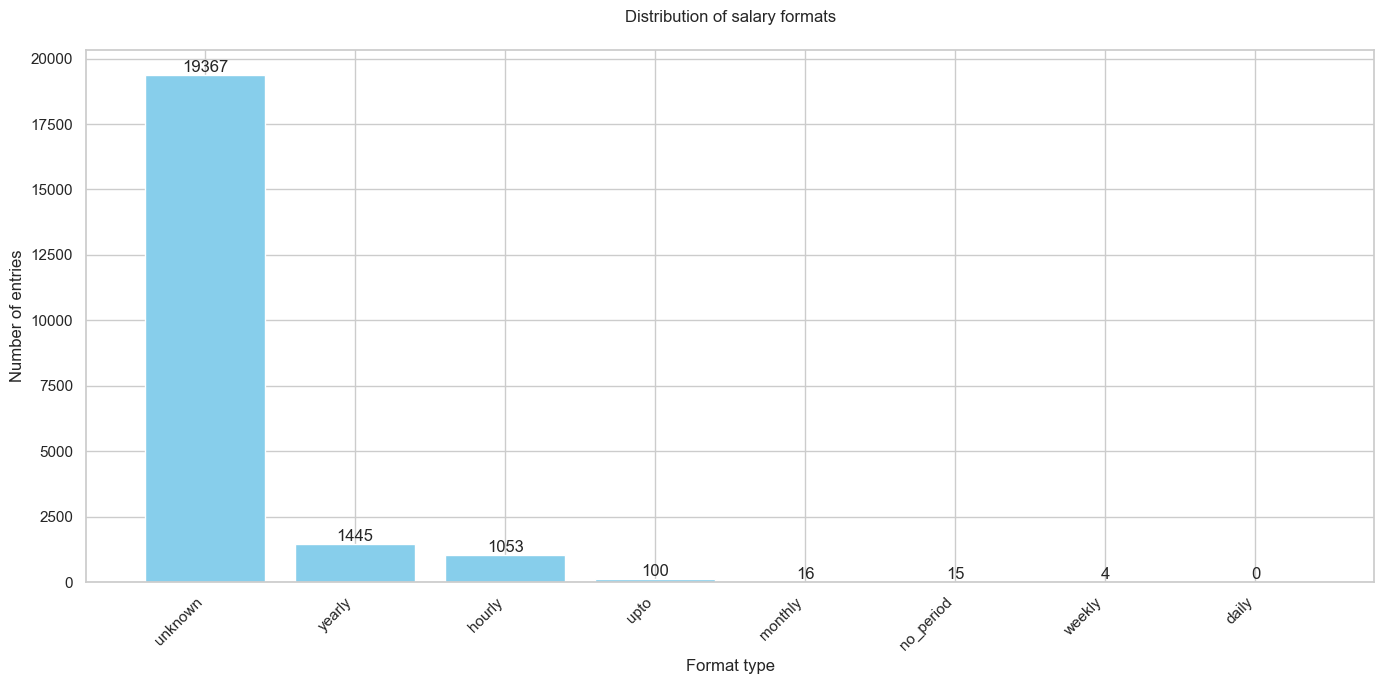

Детальная статистика по форматам:
salary_format
unknown             19367
range_year           1376
range_hour            984
upto                  100
from_year_plus         69
from_hour_plus         69
range_month            16
range_no_period         9
single_no_period        6
range_week              4
Name: count, dtype: int64


In [ ]:
patterns_salary = {
    "range_hour": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*/\s*hour\s*$",
    "range_day": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*/\s*day\s*$",
    "range_week": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*/\s*week\s*$",
    "range_month": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*/\s*month\s*$",
    "range_year": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*/\s*year\s*$",
    "single_hour": r"^\s*\$?\s*[\d,]+\.\d+\s*/\s*hour\s*$",
    "single_day": r"^\s*\$?\s*[\d,]+\.\d+\s*/\s*day\s*$",
    "single_week": r"^\s*\$?\s*[\d,]+\.\d+\s*/\s*week\s*$",
    "single_month": r"^\s*\$?\s*[\d,]+\.\d+\s*/\s*month\s*$",
    "single_year": r"^\s*\$?\s*[\d,]+\.\d+\s*/\s*year\s*$",
    "from_hour_plus": r"^\s*\$?\s*[\d,]+\.\d+\+?\s*/\s*hour\s*$",
    "from_year_plus": r"^\s*\$?\s*[\d,]+\.\d+\+?\s*/\s*year\s*$",
    "from_month_plus": r"^\s*\$?\s*[\d,]+\.\d+\+?\s*/\s*month\s*$",
    "upto": r"^\s*up to\s+\$?\s*[\d,]+\.\d+\s*$",
    "range_no_period": r"^\s*\$?\s*[\d,]+\.\d+\s*-\s*\$?\s*[\d,]+\.\d+\s*\$?\s*$",
    "single_no_period": r"^\s*\$?\s*[\d,]+\.\d+\s*$"
}

def detect_salary_format(sal):
    if pd.isna(sal) or str(sal).strip() == "":
        return "unknown"
    sal = str(sal).strip().lower()
    for fmt, pattern in patterns_salary.items():
        if re.fullmatch(pattern, sal, re.IGNORECASE):
            return fmt
    return "unknown"

df_salary["salary_format"] = df_salary["salary"].apply(detect_salary_format)

plt.figure(figsize=(14, 7))
counts = df_salary["salary_format"].value_counts()

# Группируем похожие форматы для лучшей читаемости
grouped_counts = pd.Series({
    "hourly": counts[counts.index.str.contains('hour')].sum(),
    "daily": counts[counts.index.str.contains('day')].sum(),
    "weekly": counts[counts.index.str.contains('week')].sum(),
    "monthly": counts[counts.index.str.contains('month')].sum(),
    "yearly": counts[counts.index.str.contains('year')].sum(),
    "no_period": counts[counts.index.str.contains('no_period')].sum(),
    "upto": counts["upto"],
    "unknown": counts["unknown"] if "unknown" in counts else 0
})

# Сортируем для удобства
grouped_counts = grouped_counts.sort_values(ascending=False)

bars = plt.bar(grouped_counts.index, grouped_counts.values, color='skyblue')
plt.title('Distribution of salary formats', pad=20)
plt.xlabel('Format type')
plt.ylabel('Number of entries')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Детальная статистика по форматам:")
print(counts.sort_values(ascending=False))

unknown — почти 20 000 записей — это плохой знак: бОльшую часть данных не удалось распознать. При просмотре датасета видно, что огромная часть вакансий не указывает зп в принципе. Исходя из визуализации пропусков, 84,34% ячеек в столбце зарплаты пустые.

Следом идут годовые и почасовые виды оплат.



#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

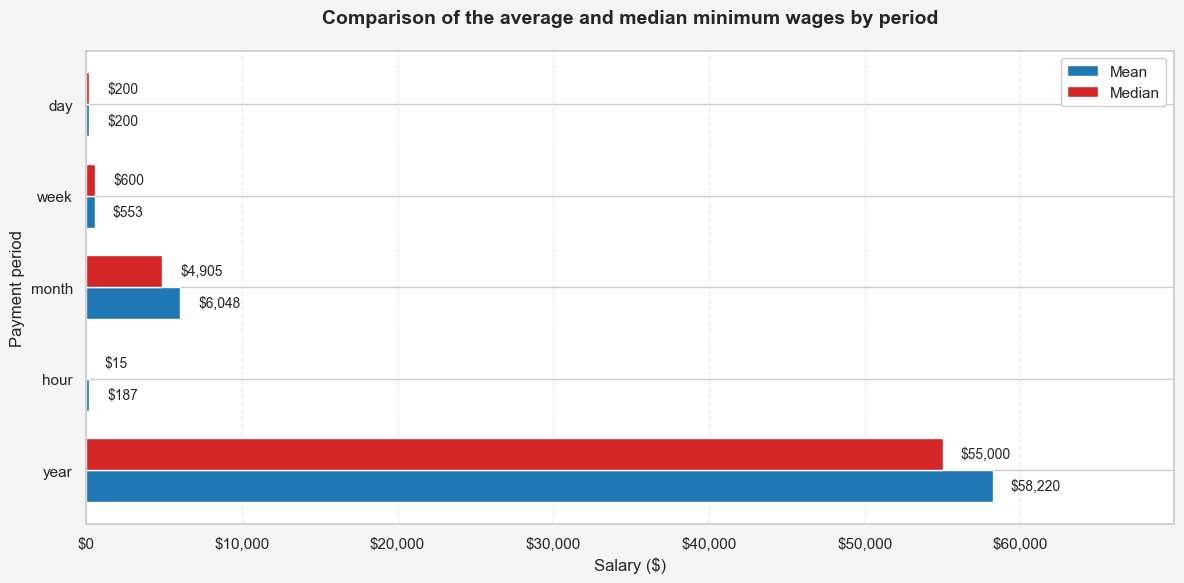

Статистика по периодам:
                mean    median  count
period                               
year    58219.983806  55000.00   1750
hour      187.278295     15.00   1144
month    6048.408824   4905.22     17
week      553.166667    600.00      6
day       200.000000    200.00      1


In [ ]:
def extract_salary_values(salary):
    if pd.isna(salary) or str(salary).strip() == "":
        return None, None, None

    salary_str = str(salary).strip()
    amounts = re.findall(r'\$?\s*(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)', salary_str)
    clean_amounts = [float(amt.replace(',', '')) for amt in amounts if amt.replace(',', '').replace('.', '').isdigit()]

    if not clean_amounts:
        return None, None, None

    min_salary = min(clean_amounts)
    max_salary = max(clean_amounts) if len(clean_amounts) > 1 else None

    period_patterns = {
        'hour': r'/hour|/hr|\bper hour\b',
        'day': r'/day|\bper day\b',
        'week': r'/week|/wk|\bper week\b',
        'month': r'/month|/mo|\bper month\b',
        'year': r'/year|/yr|\bper year\b'
    }

    period = next((p for p, pat in period_patterns.items() if re.search(pat, salary_str, re.I)), None)

    if 'up to' in salary_str.lower() or 'до' in salary_str.lower():
        min_salary, max_salary = None, max(clean_amounts)
    elif '+' in salary_str:
        max_salary = None

    return min_salary, max_salary, period

df_salary[['min_salary', 'max_salary', 'period']] = df_salary['salary'].apply(
    lambda x: pd.Series(extract_salary_values(x)))
df_salary['min_salary'] = pd.to_numeric(df_salary['min_salary'], errors='coerce')
df_salary['max_salary'] = pd.to_numeric(df_salary['max_salary'], errors='coerce')

# Анализ по периодам
period_stats = df_salary[df_salary['period'].notna()].groupby('period')['min_salary'].agg(['mean', 'median', 'count'])
period_stats = period_stats.sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))

colors = {'mean': '#1f77b4', 'median': '#d62728'}  # Синий и красный
y_pos = np.arange(len(period_stats))
bar_height = 0.35

# Рисуем горизонтальные столбцы
mean_bars = plt.barh(y_pos - bar_height/2, period_stats['mean'],
                    height=bar_height, color=colors['mean'], label='Mean')
median_bars = plt.barh(y_pos + bar_height/2, period_stats['median'],
                      height=bar_height, color=colors['median'], label='Median')

plt.title('Comparison of the average and median minimum wages by period',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Salary ($)', fontsize=12)
plt.ylabel('Payment period', fontsize=12)
plt.yticks(y_pos, period_stats.index)
plt.grid(axis='x', linestyle='--', alpha=0.4)

def currency_formatter(x, pos):
    return f'${x:,.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

for bars in [mean_bars, median_bars]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + max(period_stats['mean']) * 0.02, bar.get_y() + bar.get_height()/2,
                f'${width:,.0f}',
                va='center', ha='left', fontsize=10)

plt.legend(framealpha=1, loc='upper right')

plt.gcf().set_facecolor('#f5f5f5')
plt.gca().set_facecolor('#ffffff')
plt.xlim(0, max(period_stats['mean']) * 1.2)

plt.tight_layout()
plt.show()

print("Статистика по периодам:")
print(period_stats)

####Выводы####
1. **Средняя зарплата почти всегда выше медианной:**

  * Это видно особенно на примерах ежегодной ($58,220vs$55,000) и ежемесячной зарплаты ($6,048 vs $4,905).

  * Это говорит о асимметричном распределении — вероятно, есть очень высокие значения, которые завышают среднее, но не влияют на медиану.

2. **Сильное расхождение между средней и медианной почасовой зарплатой:**

  * Средняя = $187, медиана = $15.

  * Вероятно, есть единичные записи с экстремально высокими значениями почасовой оплаты, которые сильно искажают среднюю.

3. **Небольшое расхождение на уровне недели и месяца:**

  * Разница между средней и медианной на неделе небольшая: $553 vs $600.

  * На месяце — более ощутимая: $6,048 vs $4,905.

4. **Для дневной оплаты нет разброса:**

  * Средняя и медианная равны ($200), и количество наблюдений — всего 1.

  * Следовательно, по одному дню выводы делать нельзя — недостаточно данных. Скорее всего форматы записи дневной ставки очень разнятся и не попались на регулярку.



#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

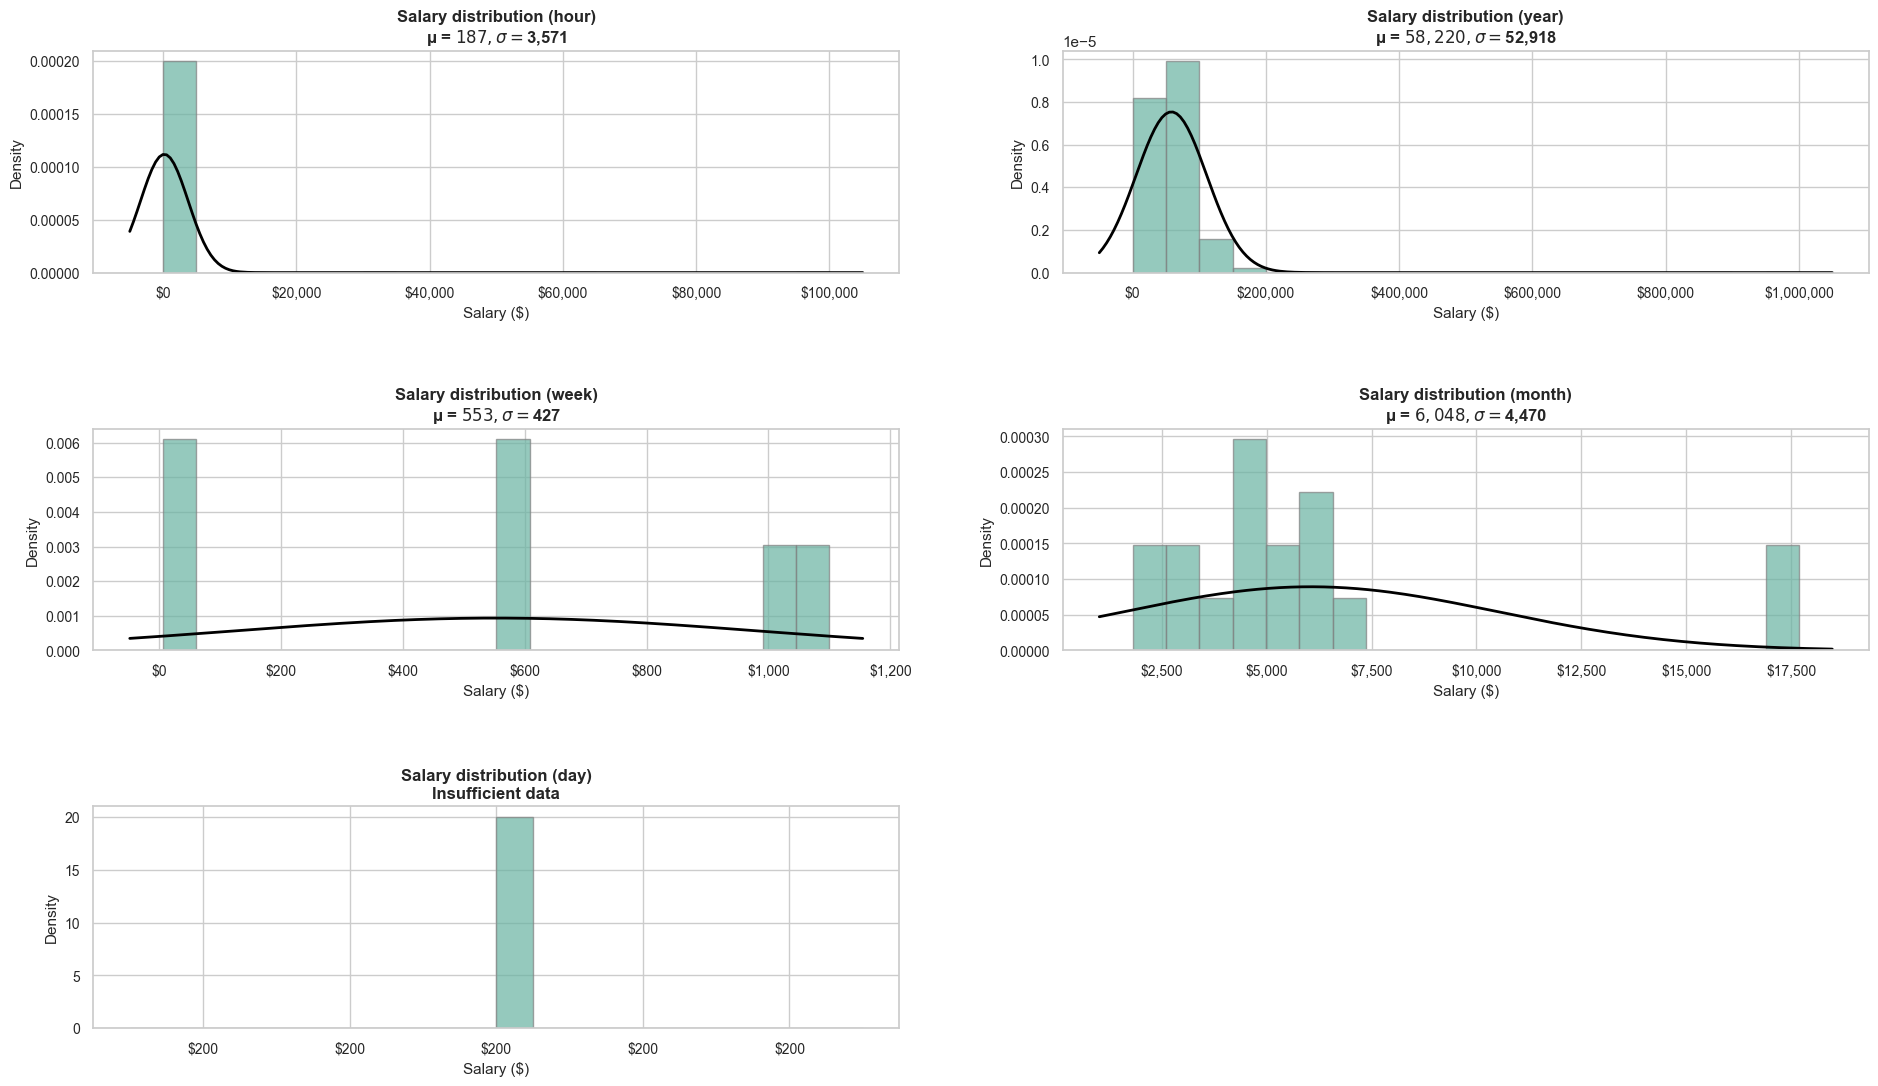

In [ ]:
known_periods = df_salary[df_salary['min_salary'].notna() & df_salary['period'].notna()]

periods = known_periods['period'].unique()

sns.set(style='whitegrid', palette='pastel')

color = "#69b3a2"

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
axs = axs.flatten()

for i, period in enumerate(periods):
    ax = axs[i]
    period_data = known_periods[known_periods['period'] == period]['min_salary'].dropna()

    # Гистограмма
    ax.hist(period_data, bins=20, density=True, alpha=0.7, color=color, edgecolor='gray')

    if len(period_data) > 1 and np.std(period_data) > 0:
        mu, std = norm.fit(period_data)
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 200)
        p = norm.pdf(x, mu, std)
        ax.plot(x, p, 'black', linewidth=2)
        ax.set_title(f'Salary distribution ({period})\nμ = ${mu:,.0f}, σ = ${std:,.0f}',
                     fontsize=12, fontweight='semibold')
    else:
        ax.set_title(f'Salary distribution ({period})\nInsufficient data',
                     fontsize=12, fontweight='semibold')

    ax.set_xlabel('Salary ($)', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
    ax.tick_params(axis='both', which='major', labelsize=10)

# Удалим пустые оси
for j in range(len(periods), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=4)
plt.show()


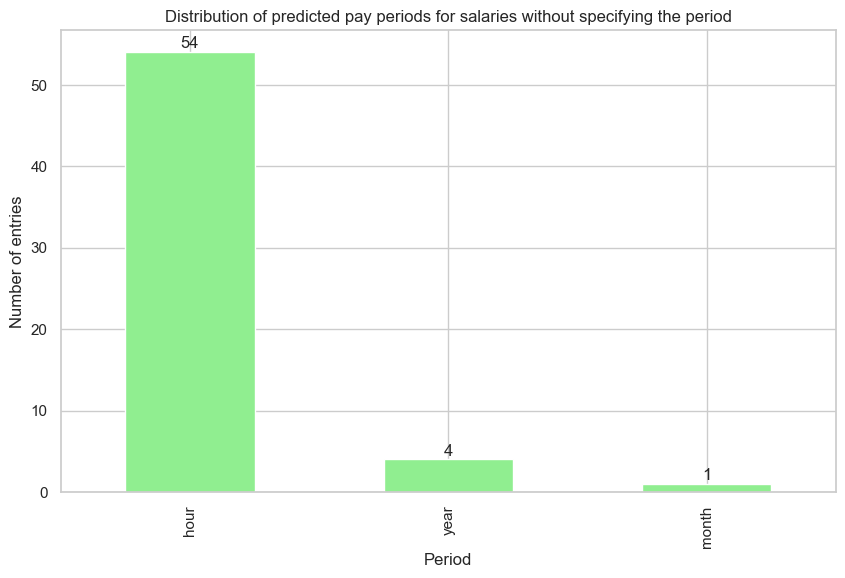


Статистика по известным периодам:
                mean           std  count
period                                   
day       200.000000           NaN      1
hour      187.278295   3572.095576   1144
month    6048.408824   4607.149473     17
week      553.166667    467.810396      6
year    58219.983806  52933.251663   1750

Результаты предсказания периодов:
Всего записей без периода: 59
Удалось определить период для: 59 записей

Примеры предсказаний:
Зарплата: $401.00 → Предсказанный период: hour
Зарплата: $108,887.00 → Предсказанный период: year
Зарплата: $72.00 → Предсказанный период: hour
Зарплата: $401.00 → Предсказанный период: hour
Зарплата: $40,000.00 → Предсказанный период: year


In [ ]:
unknown_periods = df_salary[df_salary['period'].isna() & df_salary['min_salary'].notna()].copy()

# 3. Определяем ближайший период для зарплат без указания периода
period_stats = known_periods.groupby('period')['min_salary'].agg(['mean', 'std', 'count'])

def find_closest_period(salary):
    if pd.isna(salary):
        return None

    min_distance = float('inf')
    closest_period = None

    for period, stats in period_stats.iterrows():
        if pd.notna(stats['mean']) and stats['std'] > 0:
            distance = abs((salary - stats['mean']) / stats['std'])

            if distance < min_distance:
                min_distance = distance
                closest_period = period
            elif distance == min_distance:
                closest_period = None  # неоднозначно

    return closest_period

# Применяем предсказание
unknown_periods['predicted_period'] = unknown_periods['min_salary'].apply(find_closest_period)

# Визуализация результатов
if not unknown_periods.empty:
    plt.figure(figsize=(10, 6))
    prediction_counts = unknown_periods['predicted_period'].value_counts()
    prediction_counts = prediction_counts[prediction_counts.index.notna()]

    if not prediction_counts.empty:
        prediction_counts.plot(kind='bar', color='lightgreen')
        plt.title('Distribution of predicted pay periods for salaries without specifying the period')
        plt.xlabel('Period')
        plt.ylabel('Number of entries')

        for i, v in enumerate(prediction_counts):
            plt.text(i, v + 0.5, str(v), ha='center')

        plt.show()
    else:
        print("Не удалось определить период для всех записей")

# Объединяем известные и предсказанные периоды
# Объединяем известные и предсказанные периоды
df_salary['final_period'] = df_salary['period'].copy()
df_salary.loc[unknown_periods.index, 'final_period'] = unknown_periods['predicted_period']


# Выводим статистику
print("\nСтатистика по известным периодам:")
print(period_stats)

print("\nРезультаты предсказания периодов:")
print(f"Всего записей без периода: {len(unknown_periods)}")
print(f"Удалось определить период для: {unknown_periods['predicted_period'].notna().sum()} записей")

print("\nПримеры предсказаний:")
sample = unknown_periods[unknown_periods['predicted_period'].notna()].sample(5, random_state=42)
for idx, row in sample.iterrows():
    print(f"Зарплата: ${row['min_salary']:,.2f} → Предсказанный период: {row['predicted_period']}")


### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

**Основные категории:**

Full Time (наиболее распространенный)

Part Time

Employee (без указания времени)

Temporary/Contract/Project

**Комбинированные форматы:**

Full Time Employee (второй по распространенности)

Full Time, Employee

Full Time, Temporary/Contract/Project

Part Time Employee

Job Type Employee (аномалия)

Job Type Full Time Employee (аномалия)

**Аномалии:**

Employee (без указания занятости)

Job Type... (похоже на ошибку ввода)

Некоторые записи содержат только Full Time или Part Time без уточнения

####Выводы####
**Несогласованность данных:**
В столбце присутствует несколько форматов для обозначения одного и того же типа занятости (например, "Full Time Employee", "Full Time, Employee", просто "Full Time").

**Рекомендации по очистке данных:**

Стандартизировать формат (например, всегда использовать "Full-Time Employee")

Разделить на два столбца: employment_type (Full-Time/Part-Time) и employee_status (Employee/Contractor/Temporary)

Удалить аномальные записи с префиксом "Job Type"



Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
print(f"Исходный df_job размер: {df_job.shape}")

df_analysis = df_job.copy()

# Функция обработки (адаптированная под ваши стандартизированные данные)
def process_job(job_type):
    if pd.isna(job_type):
        return 'Full-Time', 'Employee'

    job = str(job_type).lower().strip()

    if 'part' in job or 'pt' in job:
        emp_type = 'Part-Time'
    elif 'per diem' in job:
        emp_type = 'Per-Diem'
    else:
        emp_type = 'Full-Time'

    if 'intern' in job:
        emp_status = 'Intern'
    elif 'contract' in job or 'temp' in job:
        emp_status = 'Contractor'
    else:
        emp_status = 'Employee'

    return emp_type, emp_status

# Применяем обработку к рабочей копии
df_analysis[['employment_type', 'employee_status']] = df_analysis['job_type'].apply(
    lambda x: pd.Series(process_job(x))
)

print(f"\nРабочий df_analysis размер: {df_analysis.shape}")

print("\nТипы занятости (все 22,000 записей):")
print(df_analysis['employment_type'].value_counts(dropna=False))

print("\nСтатусы работников (все 22,000 записей):")
print(df_analysis['employee_status'].value_counts(dropna=False))

Исходный df_job размер: (22000, 17)

Рабочий df_analysis размер: (22000, 17)

Типы занятости (все 22,000 записей):
employment_type
Full-Time    20939
Part-Time      994
Per-Diem        67
Name: count, dtype: int64

Статусы работников (все 22,000 записей):
employee_status
Employee      20084
Contractor     1908
Intern            8
Name: count, dtype: int64


Значит, самый частый вид занятости это full-time.

**Расшифровка:**

* Full-Time - 20,939 записей
Все варианты полной занятости (Full Time, Full Time Employee, Full-Time, Full Time, Employee и т.д.) были объединены в эту категорию.

* Part-Time - 994 записи
Все варианты частичной занятости (Part Time, Part Time Employee, Part-Time и т.д.).

* Per-Diem - 67 записей.


Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

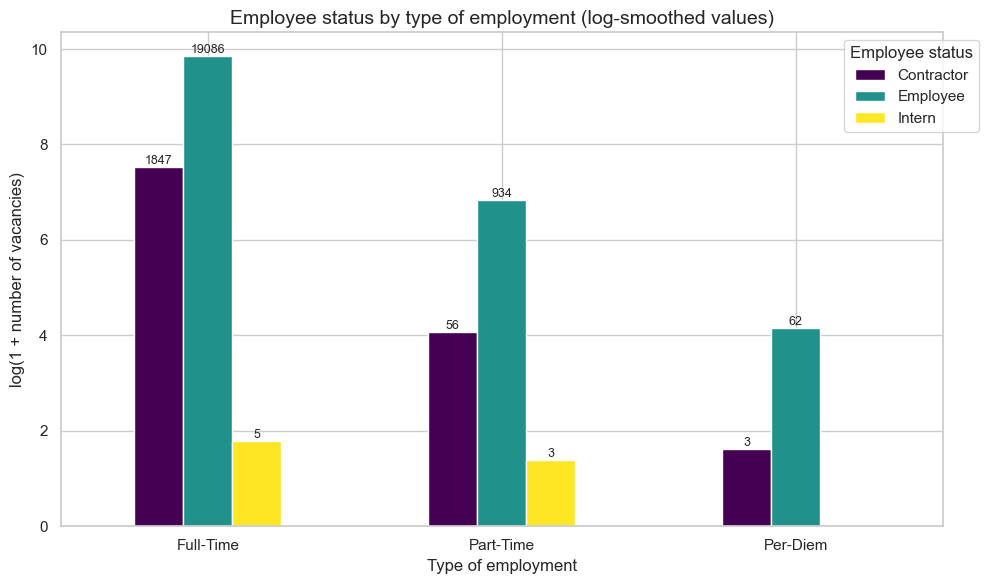

In [ ]:

grouped = df_analysis.groupby(['employment_type', 'employee_status']).size().unstack(fill_value=0)

# Применяем лог-сглаживание
grouped_log = np.log1p(grouped)  # log(1 + x)

grouped_log.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Employee status by type of employment (log-smoothed values)', fontsize=14)
plt.xlabel('Type of employment', fontsize=12)
plt.ylabel('log(1 + number of vacancies)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Employee status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

ax = plt.gca()
for container in ax.containers:
    labels = [f'{int(np.expm1(bar.get_height())):.0f}' if bar.get_height() > 0.3 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.show()



Можно заметить, что тип занятости "Intern" встречается  при "Full-time" плотности нагрузки и при частичной, что в принципе и логично, суточная занятость стажерам как правило сразу не даётся.

## Задание на защиту##

Определите, зависит ли как-то пропуск значения зарплаты от других факторов. Например, зарплату не указывают в определенных штатах, для определенного типа занятости, в определенных организациях, секторах и т.д.

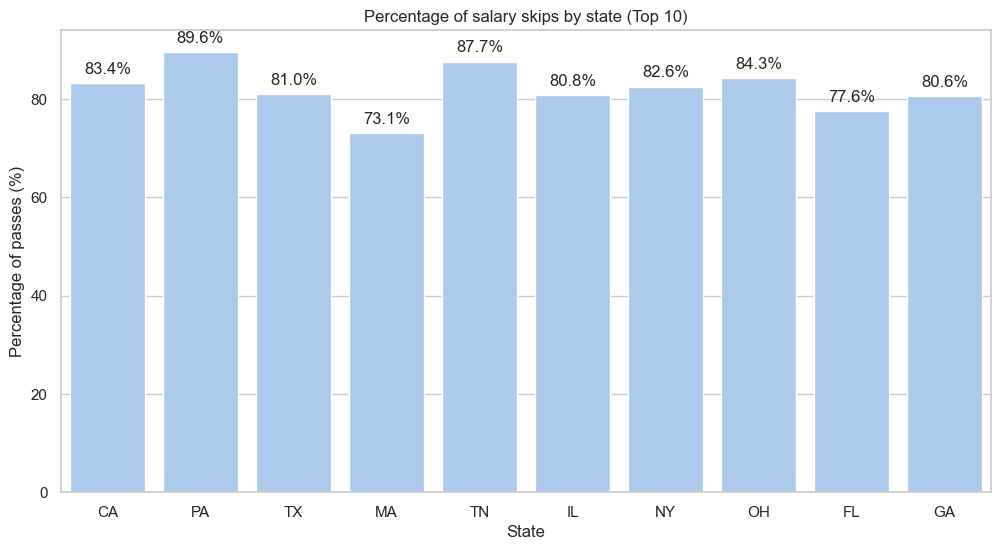


Статистическая значимость зависимости от штата: p-value = 0.0000

Общая статистика пропусков зарплаты:
Всего записей: 22000
Пропусков зарплаты: 18554 (84.3%)


In [ ]:
# Создаем индикатор пропущенных зарплат
df['salary_missing'] = df['salary'].isna().astype(int)

if 'state' in df.columns:
    state_data = df.dropna(subset=['state'])

    # Выбираем топ-10 штатов
    top_states = state_data['state'].value_counts().nlargest(10).index

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        x='state',
        y='salary_missing',
        data=state_data[state_data['state'].isin(top_states)],
        estimator=lambda x: np.mean(x) * 100, # Процент пропусков
        errorbar=None

    )
    plt.title('Percentage of salary skips by state (Top 10)')
    plt.ylabel('Percentage of passes (%)')
    plt.xlabel('State')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    plt.show()

    # Статистический тест
    contingency_table = pd.crosstab(state_data['salary_missing'], state_data['state'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nСтатистическая значимость зависимости от штата: p-value = {p:.4f}")
else:
    print("\nСтолбец 'state' отсутствует - анализ по штатам невозможен")

if 'employment_type' in df.columns:
    emp_data = df.dropna(subset=['employment_type'])

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        x='employment_type',
        y='salary_missing',
        data=emp_data,
        estimator=lambda x: np.mean(x) * 100  # Процент пропусков
    )
    plt.title('Процент пропусков зарплаты по типам занятости')
    plt.ylabel('Процент пропусков (%)')
    plt.xlabel('Тип занятости')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    plt.show()

# 4. Дополнительные проверки
print("\nОбщая статистика пропусков зарплаты:")
print(f"Всего записей: {len(df)}")
print(f"Пропусков зарплаты: {df['salary_missing'].sum()} ({df['salary_missing'].mean()*100:.1f}%)")

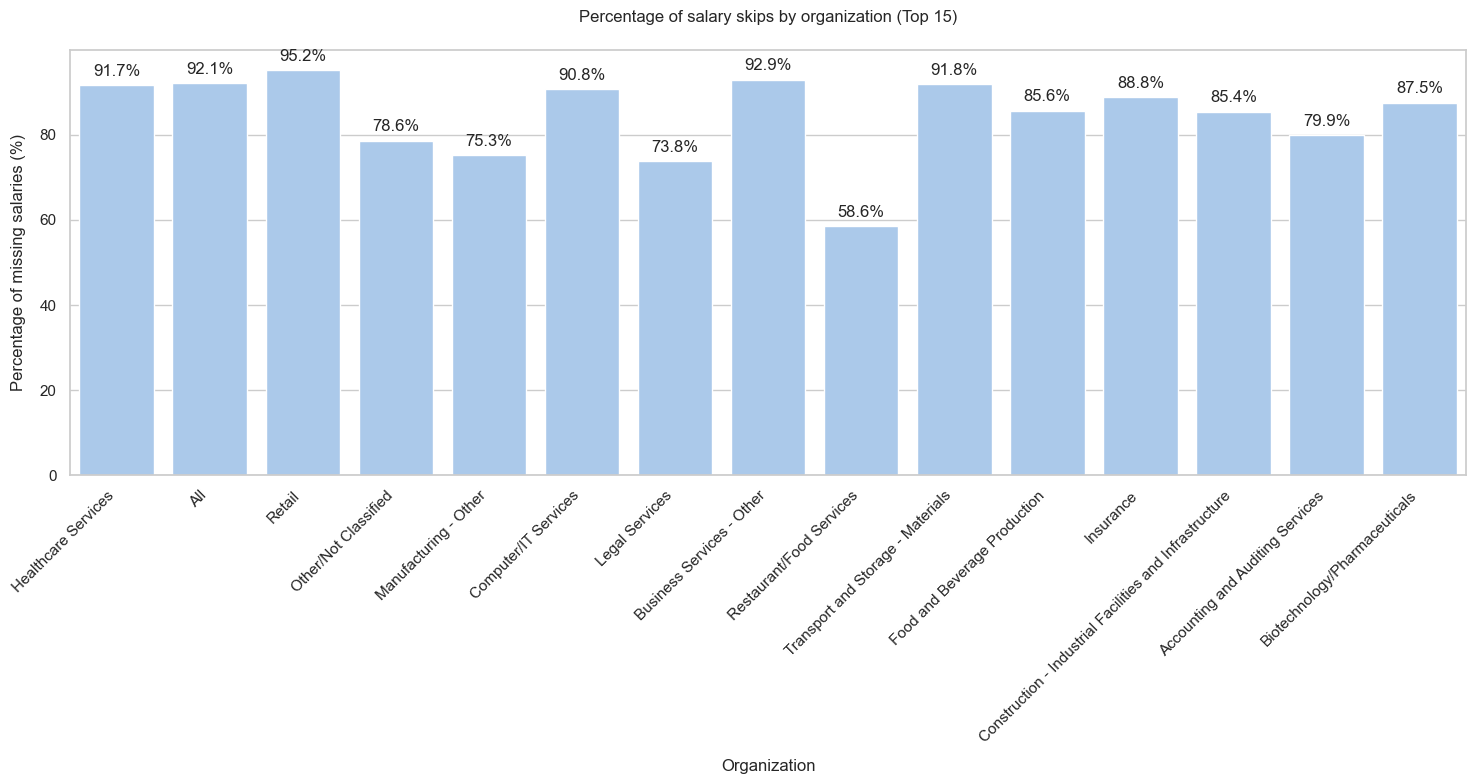


Statistical significance for organizations: p-value = 0.0000


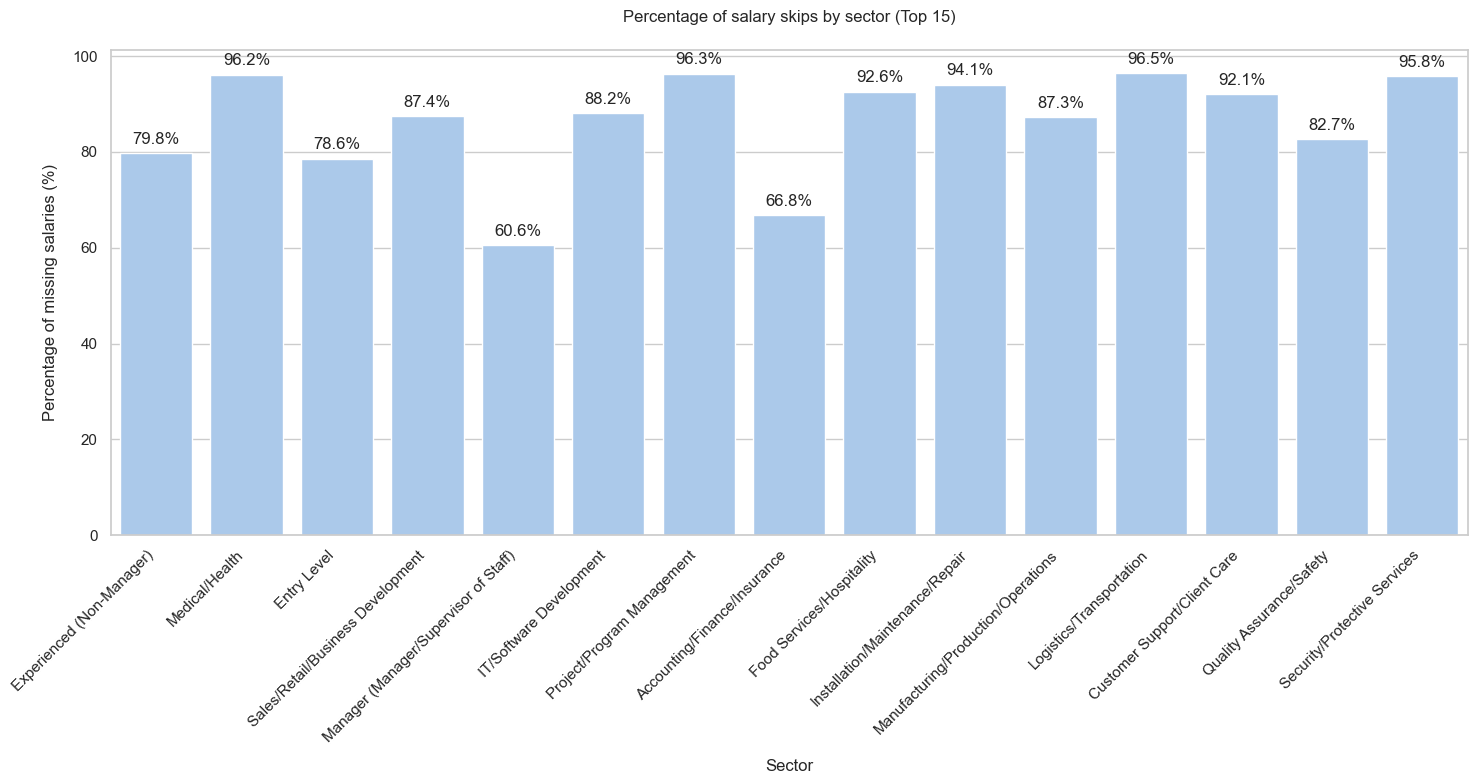


Statistical significance for sectors: p-value = 0.0000


In [ ]:

# Анализ по организациям (organization) - топ-15
if 'organization' in df.columns:
    org_data = df.dropna(subset=['organization']).copy()
    org_data['salary_missing'] = org_data['salary'].isna()  # <-- ВАЖНО!

    top_orgs = org_data['organization'].value_counts().nlargest(15).index

    plt.figure(figsize=(15, 8))
    ax = sns.barplot(
        x='organization',
        y='salary_missing',
        data=org_data[org_data['organization'].isin(top_orgs)],
        estimator=lambda x: np.mean(x) * 100,
        errorbar=None,
        order=top_orgs
    )
    plt.title('Percentage of salary skips by organization (Top 15)', pad=20)
    plt.ylabel('Percentage of missing salaries (%)', labelpad=10)
    plt.xlabel('Organization', labelpad=10)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Статистический тест
    contingency_table = pd.crosstab(org_data['salary_missing'], org_data['organization'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nStatistical significance for organizations: p-value = {p:.4f}")
else:
    print("\nColumn 'organization' is missing - organization analysis is not possible")

# Анализ по секторам (sector)
if 'sector' in df.columns:
    sector_data = df.dropna(subset=['sector']).copy()
    sector_data['salary_missing'] = sector_data['salary'].isna()  # <-- ВАЖНО!

    top_sectors = sector_data['sector'].value_counts().nlargest(15).index

    plt.figure(figsize=(15, 8))
    ax = sns.barplot(
        x='sector',
        y='salary_missing',
        data=sector_data[sector_data['sector'].isin(top_sectors)],
        estimator=lambda x: np.mean(x) * 100,
        errorbar=None,
        order=top_sectors
    )
    plt.title('Percentage of salary skips by sector (Top 15)', pad=20)
    plt.ylabel('Percentage of missing salaries (%)', labelpad=10)
    plt.xlabel('Sector', labelpad=10)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

    contingency_table = pd.crosstab(sector_data['salary_missing'], sector_data['sector'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nStatistical significance for sectors: p-value = {p:.4f}")
else:
    print("\nColumn 'sector' is missing - sector analysis is not possible")


                        country country_code date_added has_expired  \
0      United States of America           US        NaN          No   
13     United States of America           US        NaN          No   
38     United States of America           US        NaN          No   
45     United States of America           US        NaN          No   
46     United States of America           US        NaN          No   
...                         ...          ...        ...         ...   
21966  United States of America           US        NaN          No   
21975  United States of America           US        NaN          No   
21988  United States of America           US        NaN          No   
21991  United States of America           US        NaN          No   
21994  United States of America           US        NaN          No   

              job_board                                    job_description  \
0      jobs.monster.com  TeamSoft is seeing an IT Support Specialist 

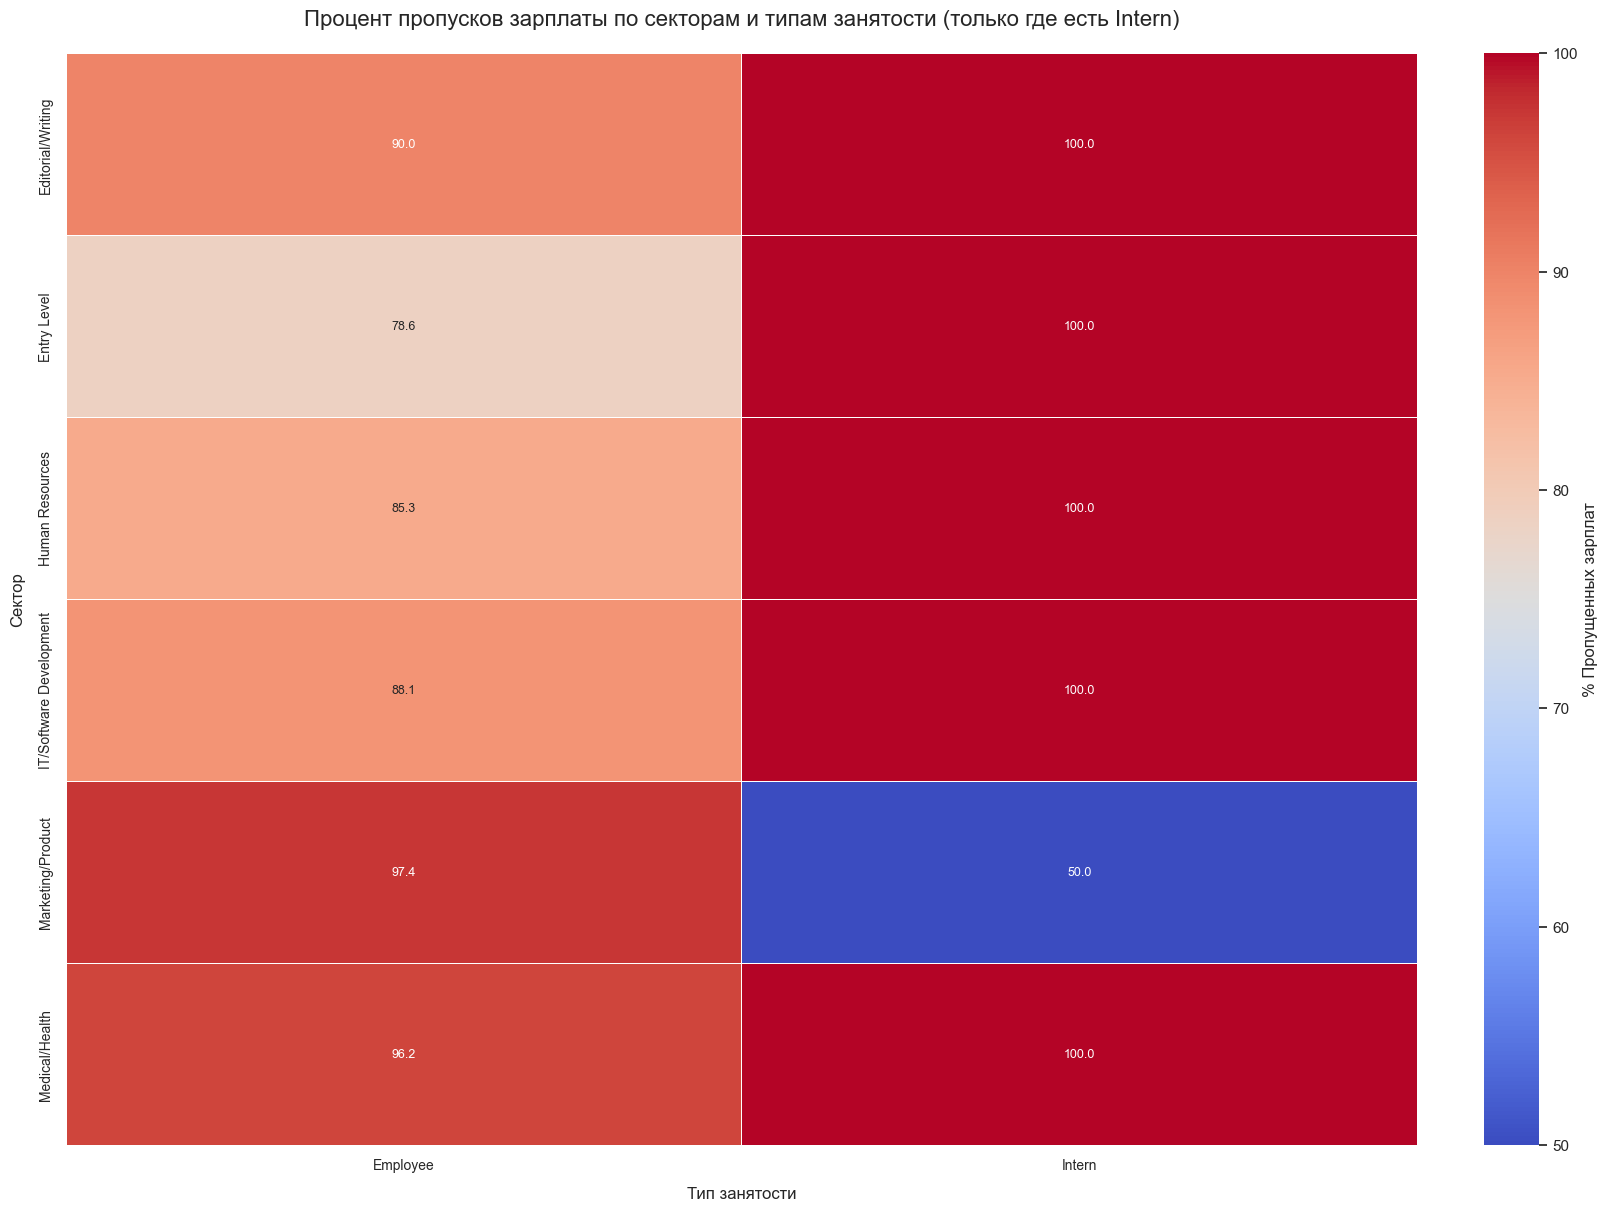

In [ ]:
# --- Функция для разбора job_type ---
def split_job_type(job_type):
    if pd.isna(job_type):
        return pd.Series(['Full Time', 'Employee'])

    job_lower = str(job_type).lower()

    if re.search(r'full|ft|full[\s-]*time', job_lower):
        fullness = 'Full Time'
    elif re.search(r'part|pt|part[\s-]*time', job_lower):
        fullness = 'Part Time'
    elif re.search(r'per[\s-]*diem|daily', job_lower):
        fullness = 'Per Diem'
    else:
        fullness = 'Full Time'

    if re.search(r'employee|empl|emp', job_lower):
        job_type_category = 'Employee'
    elif re.search(r'intern|trainee', job_lower):
        job_type_category = 'Intern'
    elif re.search(r'temp|temporary|contract', job_lower):
        job_type_category = 'Contractor'
    else:
        job_type_category = 'Employee'

    return pd.Series([fullness, job_type_category])

# --- Преобразование данных ---
df[['employment_fullness', 'employment_type']] = df['job_type'].apply(split_job_type)
df['salary_missing'] = df['salary'].isna()

# --- Фильтрация секторов, где есть Intern ---
sectors_with_intern = df[df['employment_type'] == 'Intern']['sector'].dropna().unique()

# --- Создание сводной таблицы только для этих секторов ---
filtered_df = df[df['sector'].isin(sectors_with_intern)]
print(filtered_df)

pivot_table = filtered_df.pivot_table(
    index='sector',
    columns='employment_type',
    values='salary_missing',
    aggfunc='mean'
) * 100

plt.figure(figsize=(16, 12), constrained_layout=True)
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': '% Пропущенных зарплат'},
    annot_kws={'size': 9}
)
plt.title('Процент пропусков зарплаты по секторам и типам занятости (только где есть Intern)', fontsize=16, pad=20)
plt.xlabel('Тип занятости', fontsize=12, labelpad=10)
plt.ylabel('Сектор', fontsize=12, labelpad=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Можно сделать вывод, что из всех возможных зависимостей имеет влияние статус занятости: у стажеров часто рабочий процесс не оплачивается, вот стажировка и забрала на себя самые большие проценты по пропускам

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.